# Handlinge the data processing with housing_dmain.ipynb

In [1]:
import os
import csv
import numpy as np
import pandas as pd
from copy import deepcopy

## Basic data loading part

In [11]:
csv_file_path = './housing_data.csv'

def load_csv(csv_file_path):
    ori_data = []
    with open(csv_file_path, mode='r', newline='') as file:
        reader = csv.reader(file)
        header = next(reader)  
        for row in reader:
            ori_data.append(row)

    df = pd.DataFrame(ori_data, columns=header)
    print(header)
    return df

df = load_csv(csv_file_path)
print(df.shape)

['Area', 'No. of Rooms', 'No. of Bathrooms', 'Location', 'Miles (dist. between school and house)', 'Rent Price per Month', 'Sell Price']
(1000, 7)


## Checking data quality part

In [12]:
print(df.head(5))

   Area No. of Rooms No. of Bathrooms Location  \
0  1360            1                1    Rural   
1  1794            3                1   Suburb   
2  1630            2                1   Suburb   
3  1595            1                1   Suburb   
4  2138            1                1   Suburb   

  Miles (dist. between school and house) Rent Price per Month Sell Price  
0                                    463                 7401   74446632  
1                                    210                 9259   76199794  
2                                    157                16469   16249579  
3                                    133                18096   24291317  
4                                     10                 9923   50273384  


- Check the data missing issue

In [13]:
print("DataFrame Information：")
print(df.info())

DataFrame Information：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Area                                    1000 non-null   object
 1   No. of Rooms                            1000 non-null   object
 2   No. of Bathrooms                        1000 non-null   object
 3   Location                                1000 non-null   object
 4   Miles (dist. between school and house)  1000 non-null   object
 5   Rent Price per Month                    1000 non-null   object
 6   Sell Price                              1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB
None


- Check the unique values of the No. of bathrooms

In [14]:
unique_bathroom = df['No. of Bathrooms'].unique()
print(unique_bathroom)
df = df.drop('No. of Bathrooms', axis=1)

['1']


## Processing Part

- Change the string into float except for Location andalso check if there is any value mssing while converting

In [15]:
# Change all the info into float first
# df = df.astype(float)
df.loc[:, df.columns != 'Location'] = df.loc[:, df.columns != 'Location'].astype(float)

nan_values = df.isna().any()
print(nan_values[nan_values == True])

Series([], dtype: bool)


- Add the columns we want here
    1. Rental Yield
    2. Sell price per Area
    3. Rent Price per Area 
    4. ROI (Return of Investements)

In [16]:
# Calculate the 'Rental Yield' and add it as a new column
# This is provided by: https://rich01.com/rental-yield-calculation/ 
df['Rental Yield (%)'] = ((df['Rent Price per Month']*12) / df['Sell Price']) * 100

df['Sell Price per Area'] = df['Sell Price'] / df['Area']
df['Rent Price per Area (monthly)'] = df['Rent Price per Month'] / df['Area']

df['Sell Price per Miles'] = df['Sell Price'] / df['Miles (dist. between school and house)']
df['Rent Price per Miles (monthly)'] = df['Rent Price per Month'] / df['Miles (dist. between school and house)']

df.head(5)

,Area,No. of Rooms,Location,Miles (dist. between school and house),Rent Price per Month,Sell Price,Rental Yield (%),Sell Price per Area,Rent Price per Area (monthly),Sell Price per Miles,Rent Price per Miles (monthly)
0,1360.0,1.0,Rural,463.0,7401.0,74446632.0,0.119296,54740.170588,5.441912,160791.861771,15.984881
1,1794.0,3.0,Suburb,210.0,9259.0,76199794.0,0.145811,42474.801561,5.161093,362856.161905,44.090476
2,1630.0,2.0,Suburb,157.0,16469.0,16249579.0,1.216204,9969.066871,10.103681,103500.503185,104.898089
3,1595.0,1.0,Suburb,133.0,18096.0,24291317.0,0.893949,15229.665831,11.345455,182641.481203,136.06015
4,2138.0,1.0,Suburb,10.0,9923.0,50273384.0,0.236857,23514.211413,4.641254,5027338.4,992.3


## For Q3
- I have to live in the city center for sure

In [18]:
df_city = df[df['Location'] == 'City Center']
df_city

,Area,No. of Rooms,Location,Miles (dist. between school and house),Rent Price per Month,Sell Price,Rental Yield (%),Sell Price per Area,Rent Price per Area (monthly),Sell Price per Miles,Rent Price per Miles (monthly)
7,1738.0,3.0,City Center,352.0,17023.0,51362588.0,0.397714,29552.697353,9.794591,145916.443182,48.360795
8,830.0,3.0,City Center,137.0,17950.0,40783890.0,0.52815,49137.216867,21.626506,297692.627737,131.021898
11,630.0,2.0,City Center,13.0,17867.0,72977550.0,0.293794,115837.380952,28.360317,5613657.692308,1374.384615
12,2185.0,1.0,City Center,451.0,8745.0,63413770.0,0.165485,29022.320366,4.002288,140607.028825,19.390244
13,1269.0,1.0,City Center,418.0,12091.0,62692404.0,0.231435,49402.997636,9.527975,149981.827751,28.925837
...,...,...,...,...,...,...,...,...,...,...,...
981,2860.0,2.0,City Center,479.0,9645.0,27384981.0,0.42264,9575.168182,3.372378,57171.150313,20.135699
985,2791.0,3.0,City Center,147.0,7788.0,35969114.0,0.259823,12887.536367,2.790398,244687.85034,52.979592
989,885.0,2.0,City Center,120.0,19691.0,16387155.0,1.441934,18516.559322,22.249718,136559.625,164.091667
995,1375.0,1.0,City Center,33.0,16039.0,8670492.0,2.219805,6305.812364,11.664727,262742.181818,486.030303


In [19]:
df_city = df[df['Location'] == 'City Center']
top_10_lowest_rent = df_city[df_city['No. of Rooms'] == 1].sort_values(by='Rent Price per Month').head(10)

top_10_lowest_rent

,Area,No. of Rooms,Location,Miles (dist. between school and house),Rent Price per Month,Sell Price,Rental Yield (%),Sell Price per Area,Rent Price per Area (monthly),Sell Price per Miles,Rent Price per Miles (monthly)
807,505.0,1.0,City Center,273.0,6062.0,71091864.0,0.102324,140775.968317,12.00396,260409.758242,22.205128
326,2029.0,1.0,City Center,50.0,6270.0,56448489.0,0.13329,27820.842287,3.090192,1128969.78,125.4
292,1560.0,1.0,City Center,259.0,6660.0,65072621.0,0.122817,41713.21859,4.269231,251245.640927,25.714286
266,1454.0,1.0,City Center,406.0,6692.0,34317302.0,0.234004,23601.995873,4.602476,84525.374384,16.482759
35,1146.0,1.0,City Center,124.0,6719.0,43203676.0,0.186623,37699.542757,5.863002,348416.741935,54.185484
841,2417.0,1.0,City Center,386.0,6802.0,21845187.0,0.373648,9038.141084,2.814233,56593.748705,17.621762
268,1545.0,1.0,City Center,276.0,7105.0,62086288.0,0.137325,40185.299676,4.598706,224950.318841,25.742754
234,2699.0,1.0,City Center,199.0,7196.0,10975467.0,0.786773,4066.493887,2.666173,55153.100503,36.160804
492,1562.0,1.0,City Center,143.0,7293.0,54442092.0,0.160751,34854.09219,4.669014,380713.93007,51.0
24,1247.0,1.0,City Center,151.0,7524.0,23943886.0,0.377082,19201.19166,6.033681,158568.781457,49.827815


In [20]:
top_10_biggest_rent = df_city[df_city['No. of Rooms'] == 1].sort_values(by='Area').tail(10)

top_10_biggest_rent

,Area,No. of Rooms,Location,Miles (dist. between school and house),Rent Price per Month,Sell Price,Rental Yield (%),Sell Price per Area,Rent Price per Area (monthly),Sell Price per Miles,Rent Price per Miles (monthly)
271,2777.0,1.0,City Center,342.0,14345.0,7998173.0,2.152242,2880.148722,5.165646,23386.47076,41.944444
183,2794.0,1.0,City Center,37.0,18906.0,72974034.0,0.310894,26118.122405,6.766643,1972271.189189,510.972973
422,2805.0,1.0,City Center,430.0,12579.0,65195534.0,0.231531,23242.614617,4.484492,151617.52093,29.253488
351,2811.0,1.0,City Center,11.0,13997.0,65892560.0,0.254906,23440.967627,4.979367,5990232.727273,1272.454545
278,2831.0,1.0,City Center,28.0,10200.0,32632954.0,0.375081,11527.006005,3.602967,1165462.642857,364.285714
890,2843.0,1.0,City Center,20.0,19596.0,46373185.0,0.507086,16311.355962,6.892719,2318659.25,979.8
69,2843.0,1.0,City Center,396.0,14584.0,38105736.0,0.459269,13403.354203,5.129792,96226.606061,36.828283
859,2876.0,1.0,City Center,150.0,19622.0,9053407.0,2.600833,3147.916203,6.82267,60356.046667,130.813333
545,2934.0,1.0,City Center,444.0,13291.0,57982996.0,0.275067,19762.438991,4.529993,130592.333333,29.934685
273,2985.0,1.0,City Center,55.0,9699.0,41044449.0,0.283566,13750.234171,3.249246,746262.709091,176.345455


In [21]:
top_10_lowest_rent = df_city[df_city['No. of Rooms'] != 1].sort_values(by='Rent Price per Month').head(10)

top_10_lowest_rent

,Area,No. of Rooms,Location,Miles (dist. between school and house),Rent Price per Month,Sell Price,Rental Yield (%),Sell Price per Area,Rent Price per Area (monthly),Sell Price per Miles,Rent Price per Miles (monthly)
424,1395.0,3.0,City Center,330.0,6152.0,48322633.0,0.152773,34639.880287,4.410036,146432.221212,18.642424
845,1401.0,3.0,City Center,148.0,6195.0,61026153.0,0.121817,43558.995717,4.421842,412338.871622,41.858108
391,1080.0,3.0,City Center,131.0,6205.0,7141452.0,1.042645,6612.455556,5.74537,54514.900763,47.366412
338,2482.0,2.0,City Center,407.0,6289.0,67980075.0,0.111015,27389.232474,2.533844,167027.211302,15.452088
510,1717.0,3.0,City Center,314.0,6389.0,27249305.0,0.281358,15870.299942,3.721025,86781.226115,20.347134
524,1655.0,2.0,City Center,60.0,6451.0,49151508.0,0.157497,29698.796375,3.897885,819191.8,107.516667
320,1037.0,3.0,City Center,122.0,6614.0,32869644.0,0.241463,31696.860174,6.378014,269423.311475,54.213115
253,660.0,3.0,City Center,353.0,6628.0,7894554.0,1.007479,11961.445455,10.042424,22364.175637,18.776204
976,2918.0,2.0,City Center,22.0,6816.0,37785895.0,0.216462,12949.244345,2.335846,1717540.681818,309.818182
502,1250.0,3.0,City Center,410.0,6992.0,72104329.0,0.116365,57683.4632,5.5936,175864.217073,17.053659


In [22]:
top_10_biggest_rent = df_city[df_city['No. of Rooms'] != 1].sort_values(by='Area').tail(10)

top_10_biggest_rent

,Area,No. of Rooms,Location,Miles (dist. between school and house),Rent Price per Month,Sell Price,Rental Yield (%),Sell Price per Area,Rent Price per Area (monthly),Sell Price per Miles,Rent Price per Miles (monthly)
981,2860.0,2.0,City Center,479.0,9645.0,27384981.0,0.42264,9575.168182,3.372378,57171.150313,20.135699
210,2885.0,2.0,City Center,145.0,8468.0,29612248.0,0.343155,10264.210745,2.935182,204222.4,58.4
14,2891.0,3.0,City Center,312.0,9866.0,20986157.0,0.564143,7259.13421,3.41266,67263.323718,31.621795
976,2918.0,2.0,City Center,22.0,6816.0,37785895.0,0.216462,12949.244345,2.335846,1717540.681818,309.818182
58,2949.0,2.0,City Center,433.0,8204.0,78079673.0,0.126087,26476.660902,2.78196,180322.570439,18.946882
200,2950.0,2.0,City Center,271.0,11158.0,16444453.0,0.814232,5574.390847,3.782373,60680.638376,41.173432
972,2967.0,3.0,City Center,312.0,15540.0,25247186.0,0.738617,8509.331311,5.237614,80920.467949,49.807692
163,2989.0,2.0,City Center,183.0,13866.0,77626426.0,0.21435,25970.701238,4.63901,424188.120219,75.770492
415,2989.0,3.0,City Center,176.0,9551.0,35797713.0,0.320166,11976.484778,3.195383,203396.096591,54.267045
480,2992.0,2.0,City Center,254.0,7151.0,8848439.0,0.969798,2957.365976,2.39004,34836.374016,28.153543


## For Q4
- must be city center too

In [23]:
df_buy = df_city[(df_city['No. of Rooms'] != 1) & (df_city['Miles (dist. between school and house)'] < 200) & (df_city['Area'] > 2000)].sort_values(by='Sell Price').head(10)

df_buy

,Area,No. of Rooms,Location,Miles (dist. between school and house),Rent Price per Month,Sell Price,Rental Yield (%),Sell Price per Area,Rent Price per Area (monthly),Sell Price per Miles,Rent Price per Miles (monthly)
768,2633.0,2.0,City Center,167.0,7014.0,11181930.0,0.752714,4246.840106,2.663882,66957.664671,42.0
520,2180.0,2.0,City Center,51.0,7481.0,16986741.0,0.528483,7792.083028,3.431651,333073.352941,146.686275
319,2205.0,3.0,City Center,93.0,18399.0,19855509.0,1.111974,9004.765986,8.344218,213500.096774,197.83871
506,2176.0,2.0,City Center,77.0,8240.0,23321242.0,0.423991,10717.482537,3.786765,302873.272727,107.012987
569,2055.0,3.0,City Center,126.0,10821.0,24520171.0,0.529572,11931.956691,5.265693,194604.531746,85.880952
465,2826.0,3.0,City Center,54.0,13742.0,27688293.0,0.595573,9797.697452,4.862703,512746.166667,254.481481
785,2041.0,2.0,City Center,19.0,8912.0,27709264.0,0.38595,13576.317491,4.366487,1458382.315789,469.052632
179,2207.0,3.0,City Center,141.0,14988.0,28961593.0,0.621016,13122.606706,6.791119,205401.368794,106.297872
352,2095.0,2.0,City Center,102.0,10776.0,29005168.0,0.445824,13844.948926,5.143675,284364.392157,105.647059
210,2885.0,2.0,City Center,145.0,8468.0,29612248.0,0.343155,10264.210745,2.935182,204222.4,58.4


In [25]:
average_rental_yield = df['Rental Yield (%)'].mean()
average_rental_yield

0.5895450564144471

## For Q5

In [26]:
df_rent_high = df.sort_values(by='Rent Price per Month').tail(10)
df_rent_high

,Area,No. of Rooms,Location,Miles (dist. between school and house),Rent Price per Month,Sell Price,Rental Yield (%),Sell Price per Area,Rent Price per Area (monthly),Sell Price per Miles,Rent Price per Miles (monthly)
286,516.0,1.0,Rural,249.0,19891.0,77098148.0,0.309595,149415.015504,38.54845,309631.116466,79.883534
840,2328.0,1.0,City Center,437.0,19907.0,70513977.0,0.338775,30289.509021,8.551117,161359.215103,45.553776
169,501.0,2.0,Suburb,317.0,19912.0,62986402.0,0.379358,125721.361277,39.744511,198695.274448,62.81388
67,1775.0,3.0,Suburb,119.0,19913.0,64544710.0,0.370218,36363.216901,11.218592,542392.521008,167.336134
909,2938.0,3.0,Rural,50.0,19917.0,72147880.0,0.33127,24556.800545,6.779101,1442957.6,398.34
197,2294.0,3.0,Rural,81.0,19917.0,8298756.0,2.879998,3617.591979,8.682214,102453.777778,245.888889
362,1135.0,1.0,Rural,428.0,19926.0,41980709.0,0.569576,36987.408811,17.555947,98085.768692,46.556075
852,2719.0,2.0,Rural,171.0,19976.0,61413150.0,0.390327,22586.667893,7.346819,359141.22807,116.818713
155,1183.0,3.0,Rural,17.0,19979.0,67303241.0,0.356221,56892.004227,16.888419,3959014.176471,1175.235294
16,2933.0,1.0,Suburb,152.0,19993.0,72607761.0,0.330427,24755.458916,6.81657,477682.638158,131.532895


In [27]:
df_sell_high = df[df['Location'] == 'Rural'].sort_values(by='Sell Price').tail(10)
# df_sell_high = df[df['Location'] == 'Rural'].sort_values(by='Sell Price', ascending=False).reset_index(drop=True)
df_sell_high

,Area,No. of Rooms,Location,Miles (dist. between school and house),Rent Price per Month,Sell Price,Rental Yield (%),Sell Price per Area,Rent Price per Area (monthly),Sell Price per Miles,Rent Price per Miles (monthly)
823,2720.0,1.0,Rural,450.0,13296.0,74879267.0,0.213079,27529.142279,4.888235,166398.371111,29.546667
527,2992.0,3.0,Rural,439.0,15729.0,75474749.0,0.250081,25225.517714,5.257019,171924.257403,35.829157
967,550.0,1.0,Rural,127.0,8687.0,75578794.0,0.137928,137415.989091,15.794545,595108.614173,68.401575
695,2658.0,1.0,Rural,145.0,16896.0,75670777.0,0.26794,28469.065839,6.356659,521867.427586,116.524138
997,1702.0,3.0,Rural,180.0,13260.0,76086163.0,0.209131,44703.973561,7.790834,422700.905556,73.666667
854,1691.0,1.0,Rural,461.0,6060.0,76542942.0,0.095005,45264.897694,3.583678,166036.750542,13.145336
286,516.0,1.0,Rural,249.0,19891.0,77098148.0,0.309595,149415.015504,38.54845,309631.116466,79.883534
270,2585.0,2.0,Rural,404.0,8161.0,78555305.0,0.124666,30388.89942,3.15706,194443.824257,20.200495
718,2468.0,1.0,Rural,364.0,10138.0,78598476.0,0.154782,31847.032415,4.10778,215929.879121,27.851648
992,2894.0,1.0,Rural,277.0,12811.0,79971622.0,0.192233,27633.594333,4.426745,288706.216606,46.249097


In [28]:
df_sell_high = df.sort_values(by='Sell Price').tail(10)
# df_sell_high = df[df['Location'] == 'Rural'].sort_values(by='Sell Price', ascending=False).reset_index(drop=True)
df_sell_high

,Area,No. of Rooms,Location,Miles (dist. between school and house),Rent Price per Month,Sell Price,Rental Yield (%),Sell Price per Area,Rent Price per Area (monthly),Sell Price per Miles,Rent Price per Miles (monthly)
441,1253.0,1.0,City Center,378.0,17686.0,79103466.0,0.268297,63131.257781,14.114924,209268.428571,46.78836
291,2268.0,3.0,Suburb,485.0,19234.0,79199975.0,0.291424,34920.623898,8.4806,163298.917526,39.657732
528,1705.0,1.0,City Center,392.0,9093.0,79304060.0,0.137592,46512.645161,5.333138,202306.27551,23.196429
240,1943.0,1.0,Suburb,99.0,9318.0,79380135.0,0.140861,40854.418425,4.795677,801819.545455,94.121212
526,2310.0,2.0,Suburb,350.0,17414.0,79414100.0,0.263137,34378.398268,7.538528,226897.428571,49.754286
443,589.0,2.0,City Center,73.0,13365.0,79416381.0,0.201948,134832.565365,22.691002,1087895.630137,183.082192
172,2089.0,2.0,Suburb,241.0,15061.0,79657758.0,0.226886,38132.004787,7.20967,330530.116183,62.493776
55,1629.0,3.0,City Center,93.0,14386.0,79741006.0,0.216491,48950.8938,8.831185,857430.172043,154.688172
992,2894.0,1.0,Rural,277.0,12811.0,79971622.0,0.192233,27633.594333,4.426745,288706.216606,46.249097
217,762.0,2.0,City Center,118.0,9326.0,79985777.0,0.139915,104968.211286,12.238845,677845.567797,79.033898


## Calculation Part

- Get average price

In [9]:
average_sell_price = df['Sell Price'].mean()
average_rent_price = df['Rent Price per Month'].mean()

print(f"Average sell price: {average_sell_price}")
print(f"Average rent price per month: {average_rent_price}")

Average sell price: 42077500.063
Average rent price per month: 13133.528


In [10]:
average_prices_by_location = df.groupby('Location')['Sell Price'].mean()
average_rent_by_location = df.groupby('Location')['Rent Price per Month'].mean()
rental_yield_by_location = df.groupby('Location')['Rental Yield (%)'].mean()

print("Average Sell Prices by Location:\n", average_prices_by_location)
print("\nAverage Rent Prices by Location:\n", average_rent_by_location)
print("\nAverage Rental Yield by Location:\n", rental_yield_by_location)

Average Sell Prices by Location:
 Location
City Center    4.189646e+07
Rural          4.065140e+07
Suburb         4.359140e+07
Name: Sell Price, dtype: float64

Average Rent Prices by Location:
 Location
City Center    13272.215909
Rural          13086.807692
Suburb         13031.619048
Name: Rent Price per Month, dtype: float64

Average Rental Yield by Location:
 Location
City Center    0.589249
Rural          0.624575
Suburb         0.557327
Name: Rental Yield (%), dtype: float64


In [30]:
# # calculate the coefficient of distance and bot sell price and rent price
# correlation_distance_sell = df['Miles (dist. between school and house)'].corr(df['Sell Price'])
# print("Correlation between Distance and Sell Price: ", correlation_distance_sell)

# correlation_distance_sell = df['Miles (dist. between school and house)'].corr(df['Rent Price per Month'])
# print("Correlation between Distance and Rent Price per Month: ", correlation_distance_sell)

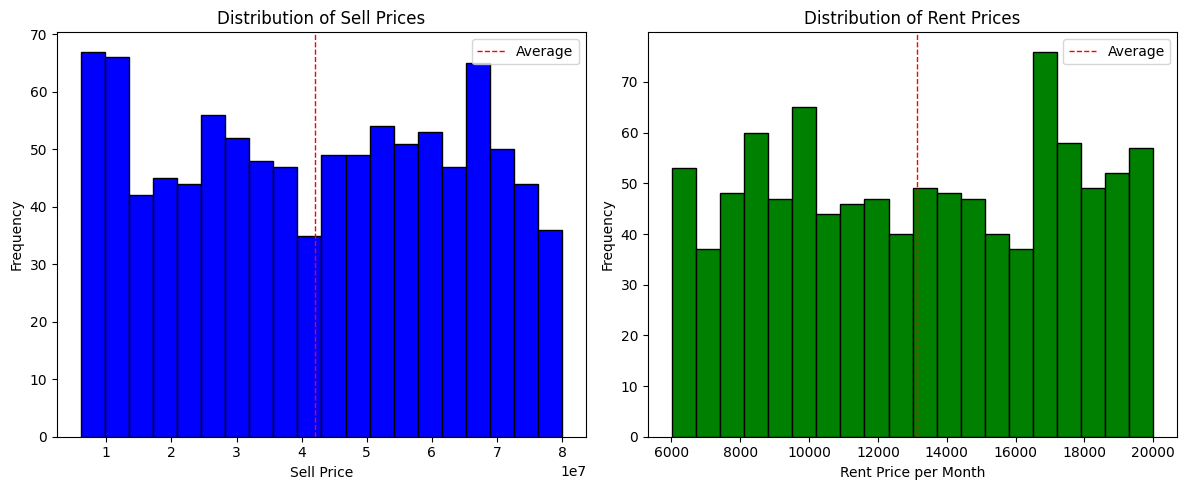

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Sell Price'], bins=20, color='blue', edgecolor='black')
plt.axvline(average_sell_price, color='red', linestyle='dashed', linewidth=1)  # 添加平均線
plt.title('Distribution of Sell Prices')
plt.xlabel('Sell Price')
plt.ylabel('Frequency')
plt.legend(['Average'])

plt.subplot(1, 2, 2)
plt.hist(df['Rent Price per Month'], bins=20, color='green', edgecolor='black')
plt.axvline(average_rent_price, color='red', linestyle='dashed', linewidth=1)  # 添加平均線
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent Price per Month')
plt.ylabel('Frequency')
plt.legend(['Average'])

plt.tight_layout()
plt.show()

## ML Prediction Part
- you can omit this part since this is not for the question in the HW

- One-hot enceding the location for further usage
- 'Rural': 0, 'Suburb': 1, 'City Center': 2

In [43]:
# Do one-hot enceding here for Location
mapping_dict = {}

unique_values = df['Location'].unique()
for i, value in enumerate(unique_values):
    mapping_dict[value] = i

df['Location'] = df['Location'].map(mapping_dict)

# use get_dummies function for one-hot encoding
one_hot_encoded_df = pd.get_dummies(df['Location'])

print(mapping_dict)
df.head(5)

{'Rural': 0, 'Suburb': 1, 'City Center': 2}


,Area,No. of Rooms,Location,Miles (dist. between school and house),Rent Price per Month,Sell Price,Rental Yield (%),Sell Price per Area,Rent Price per Area (monthly),Sell Price per Miles,Rent Price per Miles (monthly),Annual ROI (%)
0,1360.0,1.0,0,463.0,7401.0,74446632.0,0.119296,54740.170588,5.441912,160791.861771,15.984881,1.431554
1,1794.0,3.0,1,210.0,9259.0,76199794.0,0.145811,42474.801561,5.161093,362856.161905,44.090476,1.749737
2,1630.0,2.0,1,157.0,16469.0,16249579.0,1.216204,9969.066871,10.103681,103500.503185,104.898089,14.594446
3,1595.0,1.0,1,133.0,18096.0,24291317.0,0.893949,15229.665831,11.345455,182641.481203,136.06015,10.727389
4,2138.0,1.0,1,10.0,9923.0,50273384.0,0.236857,23514.211413,4.641254,5027338.4,992.3,2.842283


In [114]:
# 使用線性回歸分析房間數量和浴室數量與售價之間的關係
from sklearn.linear_model import LinearRegression

# 設定自變量X和因變量y
# X = df[['No. of Rooms', 'Area', 'Miles (dist. between school and house)']]
# X = df[['No. of Rooms', 'Area', 'Location', 'Miles (dist. between school and house)']]
X = df[['No. of Rooms', 'Location']]
y = df['Sell Price']

# 建立線性回歸模型
model = LinearRegression()
model.fit(X, y)

print("Coefficients for No. of Rooms, Area, Location, Miles with sell price:\n", model.coef_)

Coefficients for No. of Rooms, Area, Location, Miles with sell price:
 [976659.1442972 625580.2294993]


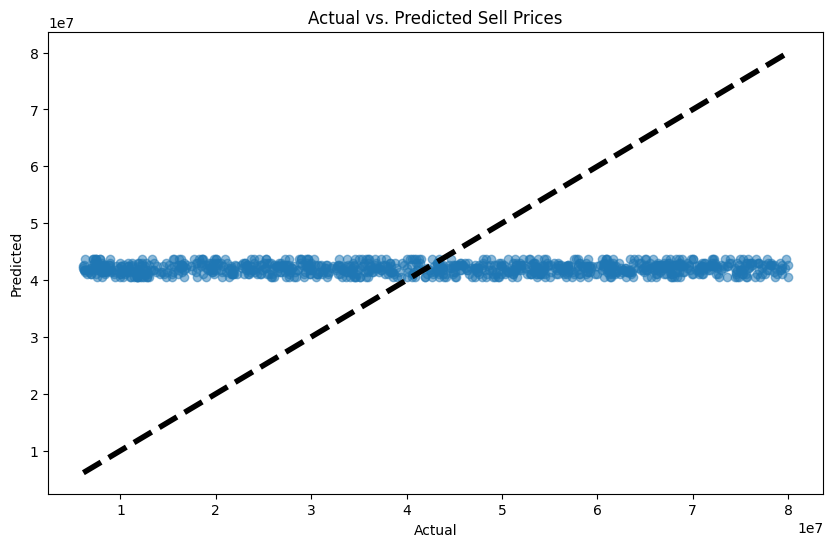

In [115]:
import matplotlib.pyplot as plt

# Predicting the Sell Price using the model
y_pred = model.predict(X)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Sell Prices')
plt.show()


In [116]:
print(y_pred)

[40475630.61777525 43054529.13586895 42077869.99157175 41101210.84727455
 41101210.84727455 41101210.84727455 40475630.61777525 43680109.36536825
 43680109.36536825 41452289.76207246 41452289.76207246 42703450.22107105
 41726791.07677385 41726791.07677385 43680109.36536825 41726791.07677385
 41101210.84727455 40475630.61777525 42077869.99157175 42703450.22107105
 43680109.36536825 41726791.07677385 41101210.84727455 43054529.13586895
 41726791.07677385 41101210.84727455 42077869.99157175 43680109.36536825
 43054529.13586895 42428948.90636966 42428948.90636966 41452289.76207246
 41452289.76207246 41726791.07677385 41726791.07677385 41726791.07677385
 40475630.61777525 41452289.76207246 43054529.13586895 42077869.99157175
 40475630.61777525 41452289.76207246 42428948.90636966 42428948.90636966
 42077869.99157175 41452289.76207246 42077869.99157175 40475630.61777525
 41452289.76207246 41452289.76207246 42077869.99157175 43054529.13586895
 43680109.36536825 40475630.61777525 41726791.07677

- Try to normalization the values

In [117]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 假定df是你的DataFrame，且已經計算好了售價和租金

# 定義一個標準化器
scaler = StandardScaler()

# 假設df只包含要標準化的數值欄位
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 顯示前五行數據
df.head(5)


,Area,No. of Rooms,Location,Miles (dist. between school and house),Rent Price per Month,Sell Price,Rental Yield (%),Sell Price per Area,Rent Price per Area (monthly),Sell Price per Miles,Rent Price per Miles (monthly)
0,-0.572489,-1.195903,-1.277830,1.459108,-1.396658,1.495905,-0.840491,1.071428,-0.627378,-0.287806,-0.509481
1,0.043669,1.259750,-0.049147,-0.319135,-0.943980,1.576926,-0.793100,0.551950,-0.672992,0.083695,-0.355455
2,-0.189165,0.031923,-0.049147,-0.691652,0.812646,-1.193610,1.120048,-0.824773,0.129844,-0.393137,-0.022214
3,-0.238855,-1.195903,-0.049147,-0.860339,1.209043,-0.821970,0.544071,-0.601970,0.331548,-0.247634,0.148561
4,0.532052,-1.195903,-0.049147,-1.724861,-0.782205,0.378764,-0.630371,-0.251093,-0.757430,8.659465,4.840971


In [118]:
# 使用線性回歸分析房間數量和浴室數量與售價之間的關係
from sklearn.linear_model import LinearRegression

# 設定自變量X和因變量y
# X = df[['No. of Rooms', 'Area', 'Miles (dist. between school and house)']]
# X = df[['No. of Rooms', 'Area', 'Location', 'Miles (dist. between school and house)']]
X = df[['No. of Rooms', 'Location']]
y = df['Sell Price']

# 建立線性回歸模型
model = LinearRegression()
model.fit(X, y)

print("Coefficients for No. of Rooms, Area, Location, Miles with sell price:\n", model.coef_)

Coefficients for No. of Rooms, Area, Location, Miles with sell price:
 [0.03676029 0.02352969]


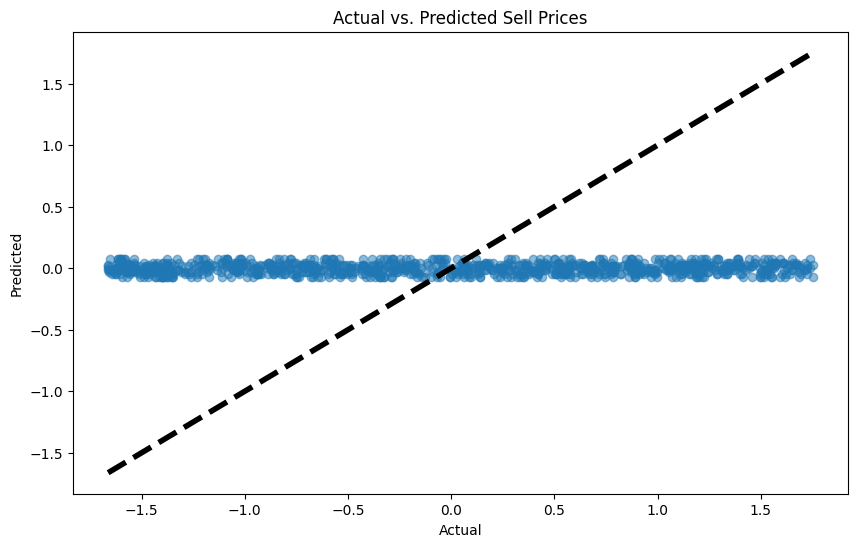

In [119]:
import matplotlib.pyplot as plt

# Predicting the Sell Price using the model
y_pred = model.predict(X)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Sell Prices')
plt.show()


In [120]:
print(y_pred)

[-7.40287140e-02  4.51523725e-02  1.70958604e-05 -4.51181807e-02
 -4.51181807e-02 -4.51181807e-02 -7.40287140e-02  7.40629057e-02
  7.40629057e-02 -2.88934374e-02 -2.88934374e-02  2.89276291e-02
 -1.62076475e-02 -1.62076475e-02  7.40629057e-02 -1.62076475e-02
 -4.51181807e-02 -7.40287140e-02  1.70958604e-05  2.89276291e-02
  7.40629057e-02 -1.62076475e-02 -4.51181807e-02  4.51523725e-02
 -1.62076475e-02 -4.51181807e-02  1.70958604e-05  7.40629057e-02
  4.51523725e-02  1.62418392e-02  1.62418392e-02 -2.88934374e-02
 -2.88934374e-02 -1.62076475e-02 -1.62076475e-02 -1.62076475e-02
 -7.40287140e-02 -2.88934374e-02  4.51523725e-02  1.70958604e-05
 -7.40287140e-02 -2.88934374e-02  1.62418392e-02  1.62418392e-02
  1.70958604e-05 -2.88934374e-02  1.70958604e-05 -7.40287140e-02
 -2.88934374e-02 -2.88934374e-02  1.70958604e-05  4.51523725e-02
  7.40629057e-02 -7.40287140e-02 -1.62076475e-02  7.40629057e-02
  4.51523725e-02  4.51523725e-02  2.89276291e-02 -2.88934374e-02
  4.51523725e-02 -2.88934

In [121]:
# 使用線性回歸分析房間數量和浴室數量與售價之間的關係
from sklearn.linear_model import LinearRegression

# 設定自變量X和因變量y
X = df[['No. of Rooms', 'Area', 'Location', 'Miles (dist. between school and house)']]
# X = df[['No. of Rooms', 'Area', 'Miles (dist. between school and house)']]
y = df['Rent Price per Month']

# 建立線性回歸模型
model = LinearRegression()
model.fit(X, y)

print("Coefficients for No. of Rooms, Area, Miles with rental price:\n", model.coef_)


Coefficients for No. of Rooms, Area, Miles with rental price:
 [ 0.01679719 -0.03522078  0.02058851 -0.05889638]


## Cache Part

In [ ]:
header = ['Area', 'No. of Rooms', 'No. of Bathrooms', 'Location', 'Miles (dist. between school and house)', 'Rent Price per Month', 'Sell Price']
header.append('Rental Yield')
data = deepcopy(ori_data)
# print(data[:2])
updated_data = []

for row in data:
    print(row)
    rent_price = float(row[5])
    sell_price = float(row[6])
    rental_rate = (rent_price / sell_price) * 100  # 转换为百分比
    row.append(rental_rate)
    updated_data.append(row)
    break

print(header[5])
updated_data[:2]

['1360', '1', '1', 'Rural', '463', '7401', '74446632']
Rent Price per Month


[['1360', '1', '1', 'Rural', '463', '7401', '74446632', 0.009941349663743014]]